<a href="https://colab.research.google.com/github/aloiswirth/deep-learning-with-python-notebooks/blob/master/chapter02_mathematical-building-blocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# The mathematical building blocks of neural networks

## A first look at a neural network

**Loading the MNIST dataset in Keras**

In [1]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

2022-09-30 09:54:06.401242: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-30 09:54:06.847669: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-30 09:54:06.847681: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-09-30 09:54:06.893711: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-09-30 09:54:08.126754: W tensorflow/stream_executor/platform/de

In [2]:
train_images.shape

(60000, 28, 28)

In [3]:
len(train_labels)

60000

In [4]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
test_images.shape

(10000, 28, 28)

In [6]:
len(test_labels)

10000

In [7]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

**The network architecture**

In [8]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

2022-09-30 09:54:11.618259: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-09-30 09:54:11.618375: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-30 09:54:11.618473: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-09-30 09:54:11.618519: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-09-30 09:54:11.618562: W tensorflow/stream_executor/platform/default/dso_loader.cc:6

**The compilation step**

In [9]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

**Preparing the image data**

In [10]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [11]:
train_images[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [12]:
train_labels[0]

5

**"Fitting" the model**

In [13]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 4ms/step - loss: 0.2567 - accuracy: 0.9251
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1027 - accuracy: 0.9694
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0681 - accuracy: 0.9795
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0494 - accuracy: 0.9849
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0379 - accuracy: 0.9886


**Using the model to make predictions**

In [14]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[9]

1/1 [==============================] - 0s 65ms/step


array([7.5436726e-11, 5.3299873e-14, 2.1469192e-10, 1.3263379e-08,
       5.2423086e-03, 7.0722606e-10, 5.0567029e-12, 3.6572473e-04,
       5.8315368e-06, 9.9438620e-01], dtype=float32)

In [15]:
predictions[9].argmax()

9

In [16]:
predictions[9][9]

0.9943862

In [17]:
test_labels[9]

9

**Evaluating the model on new data**

In [18]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 [==============================] - 1s 2ms/step - loss: 0.0715 - accuracy: 0.9785
test_acc: 0.9785000085830688


## Data representations for neural networks

### Scalars (rank-0 tensors)

In [19]:
import numpy as np
x = np.array(12)
x

array(12)

In [20]:
x.ndim

0

In [21]:
x.shape

()

### Vectors (rank-1 tensors)

In [22]:
x = np.array([12, 3, 6, 14, 7])
x

array([12,  3,  6, 14,  7])

In [23]:
x.ndim

1

In [24]:
x.shape

(5,)

### Matrices (rank-2 tensors)

In [25]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
x.ndim

2

In [26]:
x.shape

(3, 5)

### Rank-3 and higher-rank tensors

In [27]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
x.ndim

3

In [28]:
x.shape

(3, 3, 5)

### Key attributes

In [29]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [30]:
train_images.ndim

3

In [31]:
train_images.shape

(60000, 28, 28)

In [32]:
train_images.dtype

dtype('uint8')

**Displaying the fourth digit**

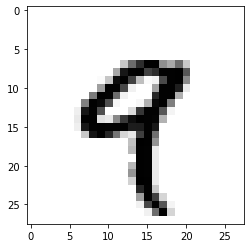

In [33]:
import matplotlib.pyplot as plt
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [34]:
train_labels[4]

9

### Manipulating tensors in NumPy

In [35]:
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

In [36]:
my_slice = train_images[10:100, :, :]
my_slice.shape

(90, 28, 28)

In [37]:
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

In [38]:
my_slice = train_images[:, 14:, 14:]
my_slice.shape

(60000, 14, 14)

In [39]:
my_slice = train_images[:, 7:-7, 7:-7]

### The notion of data batches

In [40]:
batch = train_images[:128]

In [41]:
batch = train_images[128:256]

In [42]:
n = 3
batch = train_images[128 * n:128 * (n + 1)]

### Real-world examples of data tensors

### Vector data

### Timeseries data or sequence data

### Image data

### Video data

## The gears of neural networks: tensor operations

### Element-wise operations

In [43]:
def naive_relu(x):
    assert len(x.shape) == 2
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

In [44]:
def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

In [50]:
import time

x = np.random.random((20, 100))
y = np.random.random((20, 100))

t0 = time.time()
for _ in range(10000):
    z = x + y
    z = np.maximum(z, 0.)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 0.04 s


In [49]:
print(x.shape, '\n', x)
print(y.shape, '\n',y)

(20, 100) 
 [[0.77316163 0.15141912 0.94754082 ... 0.61428266 0.64694099 0.38990619]
 [0.55575108 0.86893324 0.79442641 ... 0.03593431 0.56195455 0.27489669]
 [0.49334629 0.56363216 0.39276512 ... 0.20069921 0.95569526 0.31932357]
 ...
 [0.77268852 0.96968408 0.0881055  ... 0.54512129 0.09221608 0.45376752]
 [0.44030591 0.16433282 0.01952143 ... 0.20679192 0.99680778 0.48644167]
 [0.69796726 0.94659355 0.67384989 ... 0.19005409 0.25098019 0.52467123]]
(20, 100) 
 [[0.9165521  0.76129003 0.72552862 ... 0.83403724 0.53571776 0.69677927]
 [0.11018085 0.24477407 0.03770746 ... 0.2336534  0.27083742 0.78676164]
 [0.31454271 0.45236028 0.20786451 ... 0.06018475 0.15393706 0.02605808]
 ...
 [0.42497814 0.01630593 0.25334655 ... 0.73490727 0.31062255 0.87118288]
 [0.26623348 0.91362194 0.43907605 ... 0.66616934 0.74206012 0.5468065 ]
 [0.41882426 0.05866601 0.12968742 ... 0.10344779 0.44441401 0.79928217]]


In [52]:
t0 = time.time()
for _ in range(10000):
    z = naive_add(x, y)
    z = naive_relu(z)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 9.82 s


### Broadcasting

In [76]:
import numpy as np
X = np.random.random((32, 10))
y = np.random.random((10,))
print(X.shape)#
print(X)

(32, 10)
[[0.22934124 0.65237282 0.50251338 0.2822717  0.07034397 0.27717422
  0.50453882 0.8089046  0.33876801 0.66326588]
 [0.08895696 0.20361926 0.92604036 0.38653774 0.6377684  0.82362924
  0.58322206 0.78925903 0.48627352 0.23823534]
 [0.61414033 0.34829688 0.92604791 0.6093607  0.18192832 0.91103444
  0.2007177  0.88904789 0.23896411 0.89865339]
 [0.52397799 0.46903881 0.07057557 0.48144032 0.13023046 0.70371891
  0.65049846 0.62277774 0.69755924 0.03468359]
 [0.02690364 0.95491125 0.68040632 0.10035794 0.34827129 0.57246877
  0.1808436  0.38341741 0.29469803 0.41680779]
 [0.98165847 0.17948106 0.20807908 0.3801517  0.30665656 0.97696124
  0.98077156 0.17461692 0.46777029 0.74501367]
 [0.28080627 0.68981931 0.7818365  0.52444753 0.53423963 0.69989049
  0.36056811 0.64458177 0.83447718 0.04533008]
 [0.30559961 0.40352936 0.73836512 0.72456461 0.08433967 0.00287936
  0.66514455 0.40468193 0.82344812 0.40369695]
 [0.99142606 0.39474789 0.78639633 0.1279036  0.78678141 0.42360399
  0

In [78]:
X.shape[1] == y.shape[0]

True

In [61]:
print(x)

[[0.30596458 0.1757307  0.72157408 ... 0.896974   0.97391753 0.8033234 ]
 [0.55278346 0.18074784 0.75927916 ... 0.25971908 0.92894115 0.35651696]
 [0.84157081 0.1904707  0.79029679 ... 0.21299126 0.09684312 0.68283977]
 ...
 [0.96513454 0.68619466 0.27958481 ... 0.17524983 0.09460531 0.47767866]
 [0.5348194  0.74427825 0.91110024 ... 0.77583936 0.79035571 0.63572978]
 [0.36427336 0.00376043 0.56731718 ... 0.32491988 0.02670181 0.12166571]]


In [58]:
y = np.expand_dims(y, axis=0)
print(y.shape)
print(y)

(1, 10)
[[0.70848512 0.00570197 0.26053716 0.2647175  0.50818263 0.34548617
  0.59541069 0.93911594 0.1592604  0.10217302]]


In [63]:
Y = np.concatenate([y] * 32, axis=0)
Y

array([[0.70848512, 0.00570197, 0.26053716, 0.2647175 , 0.50818263,
        0.34548617, 0.59541069, 0.93911594, 0.1592604 , 0.10217302],
       [0.70848512, 0.00570197, 0.26053716, 0.2647175 , 0.50818263,
        0.34548617, 0.59541069, 0.93911594, 0.1592604 , 0.10217302],
       [0.70848512, 0.00570197, 0.26053716, 0.2647175 , 0.50818263,
        0.34548617, 0.59541069, 0.93911594, 0.1592604 , 0.10217302],
       [0.70848512, 0.00570197, 0.26053716, 0.2647175 , 0.50818263,
        0.34548617, 0.59541069, 0.93911594, 0.1592604 , 0.10217302],
       [0.70848512, 0.00570197, 0.26053716, 0.2647175 , 0.50818263,
        0.34548617, 0.59541069, 0.93911594, 0.1592604 , 0.10217302],
       [0.70848512, 0.00570197, 0.26053716, 0.2647175 , 0.50818263,
        0.34548617, 0.59541069, 0.93911594, 0.1592604 , 0.10217302],
       [0.70848512, 0.00570197, 0.26053716, 0.2647175 , 0.50818263,
        0.34548617, 0.59541069, 0.93911594, 0.1592604 , 0.10217302],
       [0.70848512, 0.00570197, 0.2605371

In [67]:
def naive_add_matrix_and_vector(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x

In [79]:
t0 = time.time()
naive_add_matrix_and_vector(X, y)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 0.00 s


In [80]:
import numpy as np
x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))
z = np.maximum(x, y)

### Tensor product

In [86]:
x = np.random.random((32,))
y = np.random.random((32,))
z = np.dot(x, y)
z

7.884572770384382

In [88]:
def naive_vector_dot(x, y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    z = 0.
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

In [89]:
def naive_matrix_vector_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[j]
    return z

In [90]:
def naive_matrix_vector_dot(x, y):
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_dot(x[i, :], y)
    return z

In [91]:
def naive_matrix_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]
    z = np.zeros((x.shape[0], y.shape[1]))
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            row_x = x[i, :]
            column_y = y[:, j]
            z[i, j] = naive_vector_dot(row_x, column_y)
    return z

### Tensor reshaping

In [92]:
train_images = train_images.reshape((60000, 28 * 28))

In [96]:
x = np.array([[0., 1.],
             [2., 3.],
             [4., 5.]])
x.shape

(3, 2)

In [97]:
x = x.reshape((6, 1))
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [99]:
x = x.reshape(2,3)
x

array([[0., 1., 2.],
       [3., 4., 5.]])

In [95]:
x = np.zeros((300, 20))
x = np.transpose(x)
x.shape

(20, 300)

### Geometric interpretation of tensor operations

### A geometric interpretation of deep learning

## The engine of neural networks: gradient-based optimization

### What's a derivative?

### Derivative of a tensor operation: the gradient

### Stochastic gradient descent

### Chaining derivatives: The Backpropagation algorithm

#### The chain rule

#### Automatic differentiation with computation graphs

#### The gradient tape in TensorFlow

In [ ]:
import tensorflow as tf
x = tf.Variable(0.)
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)

In [ ]:
x = tf.Variable(tf.random.uniform((2, 2)))
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)

In [ ]:
W = tf.Variable(tf.random.uniform((2, 2)))
b = tf.Variable(tf.zeros((2,)))
x = tf.random.uniform((2, 2))
with tf.GradientTape() as tape:
    y = tf.matmul(x, W) + b
grad_of_y_wrt_W_and_b = tape.gradient(y, [W, b])

## Looking back at our first example

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [ ]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

### Reimplementing our first example from scratch in TensorFlow

#### A simple Dense class

In [ ]:
import tensorflow as tf

class NaiveDense:
    def __init__(self, input_size, output_size, activation):
        self.activation = activation

        w_shape = (input_size, output_size)
        w_initial_value = tf.random.uniform(w_shape, minval=0, maxval=1e-1)
        self.W = tf.Variable(w_initial_value)

        b_shape = (output_size,)
        b_initial_value = tf.zeros(b_shape)
        self.b = tf.Variable(b_initial_value)

    def __call__(self, inputs):
        return self.activation(tf.matmul(inputs, self.W) + self.b)

    @property
    def weights(self):
        return [self.W, self.b]

#### A simple Sequential class

In [ ]:
class NaiveSequential:
    def __init__(self, layers):
        self.layers = layers

    def __call__(self, inputs):
        x = inputs
        for layer in self.layers:
           x = layer(x)
        return x

    @property
    def weights(self):
       weights = []
       for layer in self.layers:
           weights += layer.weights
       return weights

In [ ]:
model = NaiveSequential([
    NaiveDense(input_size=28 * 28, output_size=512, activation=tf.nn.relu),
    NaiveDense(input_size=512, output_size=10, activation=tf.nn.softmax)
])
assert len(model.weights) == 4

#### A batch generator

In [ ]:
import math

class BatchGenerator:
    def __init__(self, images, labels, batch_size=128):
        assert len(images) == len(labels)
        self.index = 0
        self.images = images
        self.labels = labels
        self.batch_size = batch_size
        self.num_batches = math.ceil(len(images) / batch_size)

    def next(self):
        images = self.images[self.index : self.index + self.batch_size]
        labels = self.labels[self.index : self.index + self.batch_size]
        self.index += self.batch_size
        return images, labels

### Running one training step

In [ ]:
def one_training_step(model, images_batch, labels_batch):
    with tf.GradientTape() as tape:
        predictions = model(images_batch)
        per_sample_losses = tf.keras.losses.sparse_categorical_crossentropy(
            labels_batch, predictions)
        average_loss = tf.reduce_mean(per_sample_losses)
    gradients = tape.gradient(average_loss, model.weights)
    update_weights(gradients, model.weights)
    return average_loss

In [ ]:
learning_rate = 1e-3

def update_weights(gradients, weights):
    for g, w in zip(gradients, weights):
        w.assign_sub(g * learning_rate)

In [ ]:
from tensorflow.keras import optimizers

optimizer = optimizers.SGD(learning_rate=1e-3)

def update_weights(gradients, weights):
    optimizer.apply_gradients(zip(gradients, weights))

### The full training loop

In [ ]:
def fit(model, images, labels, epochs, batch_size=128):
    for epoch_counter in range(epochs):
        print(f"Epoch {epoch_counter}")
        batch_generator = BatchGenerator(images, labels)
        for batch_counter in range(batch_generator.num_batches):
            images_batch, labels_batch = batch_generator.next()
            loss = one_training_step(model, images_batch, labels_batch)
            if batch_counter % 100 == 0:
                print(f"loss at batch {batch_counter}: {loss:.2f}")

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

fit(model, train_images, train_labels, epochs=10, batch_size=128)

### Evaluating the model

In [ ]:
predictions = model(test_images)
predictions = predictions.numpy()
predicted_labels = np.argmax(predictions, axis=1)
matches = predicted_labels == test_labels
print(f"accuracy: {matches.mean():.2f}")

## Summary